Adapted from : https://towardsdatascience.com/umap-variance-explained-b0eacb5b0801

In [1]:
from matplotlib import pyplot
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from numpy import linalg as la 
from itertools import chain
import collections
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("normalized_feature_select_batch.csv") # this data contains approx 500 features


In [3]:
features = pd.read_csv("features.csv")#initialising the columns in the data as features

In [4]:
f = features.to_numpy() #converting dataframe to numpy array
f_1 = f.flatten() #to convert a multidimentional array f to a single array f_1

In [5]:
#accessing values of the entire columns in f_1 and storing in x
x = df.loc[:, f_1].values # Separating out the features
#accessing values of the entire column of Metadata_Welll and storing in y
y = df.loc[:,['Metadata_Well']].values #Separating out target

In [6]:
x_1 = StandardScaler().fit_transform(x) 
np.random.seed(384)
random_indices = np.random.choice(384, replace=False)
# x_1 = x_1[random_indices,:]
labels = random_indices

Observed variance explained:
[0.22281402 0.18196501 0.08224385 0.06172864 0.04600458 0.03581679
 0.02850935 0.02558085 0.02402026 0.02292681]


Finished 1 permutations
Finished 2 permutations
Finished 3 permutations
Finished 4 permutations
Finished 5 permutations
Finished 6 permutations
Finished 7 permutations
Finished 8 permutations
Finished 9 permutations
Finished 10 permutations

Permuted variance explained:
[0.00993547827535998, 0.009599666053496485, 0.009385988085084574, 0.009179999055498982, 0.009050824709864569, 0.008864419191010397, 0.008765596192184583, 0.008674841297214702, 0.00850139477482224, 0.008349321761132443]

Number of significant Principal Components: 18
Together they explain 84% of variation in the data


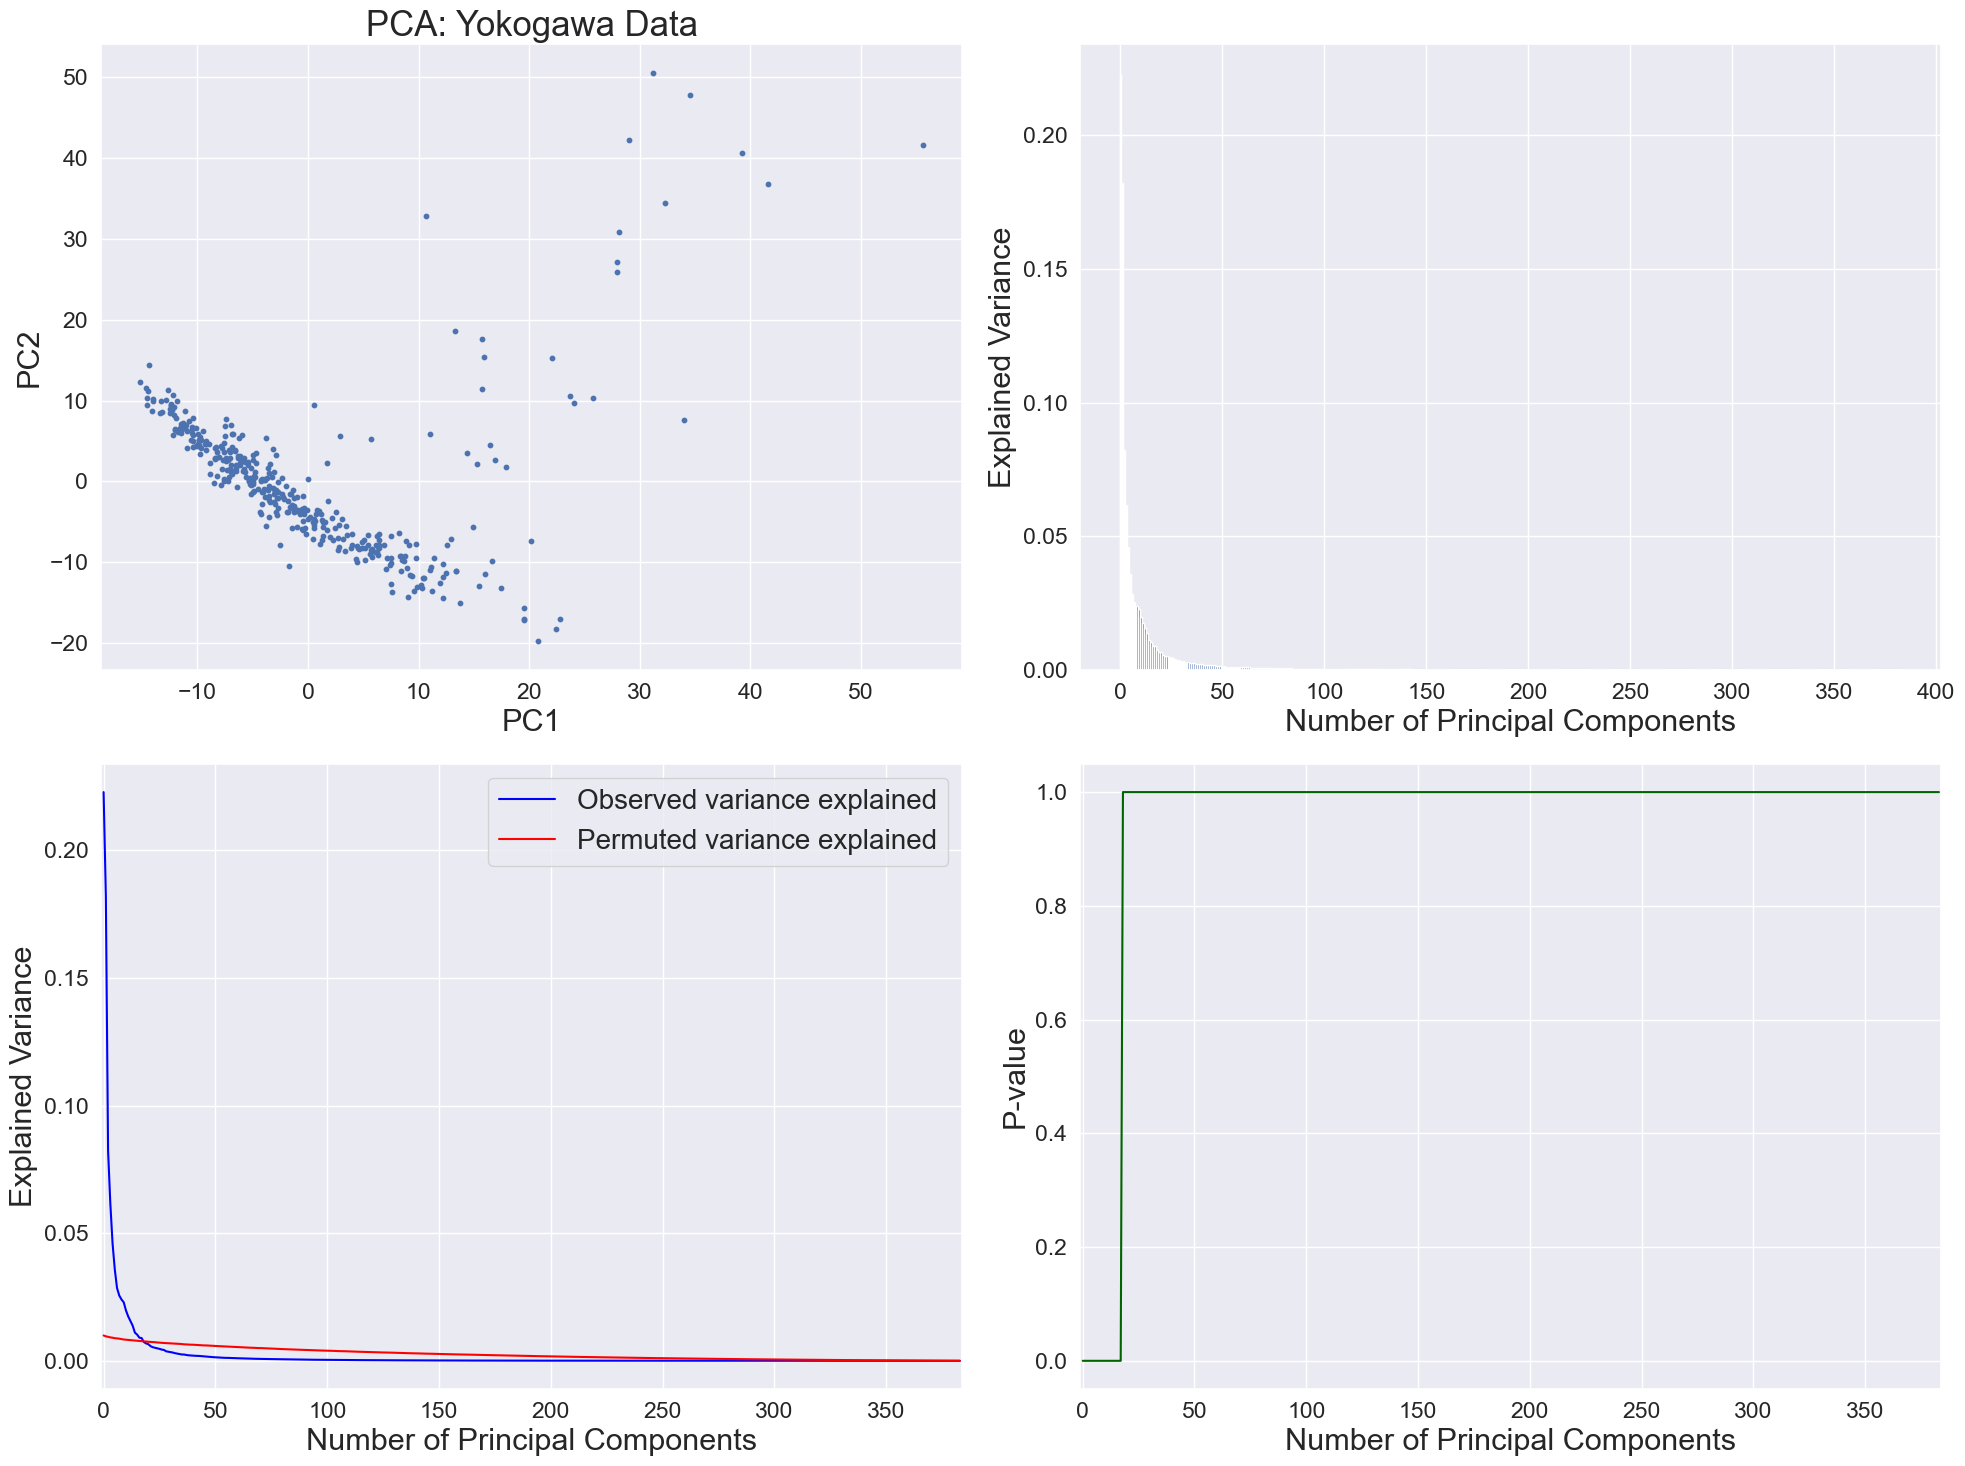

In [7]:
import pandas as pd; import matplotlib.pyplot as plt
from sklearn.decomposition import PCA; import seaborn as sns

N_pca_comps = 384

sns.set(font_scale = 1.5); figure = plt.figure(figsize = (20, 15))

plt.subplot(221)
X_reduced = PCA(n_components = 2).fit_transform(x_1)
plt.scatter(X_reduced[:,0], X_reduced[:,1], s=10)
plt.title('PCA: Yokogawa Data', fontsize = 25)
plt.xlabel('PC1', fontsize = 22); plt.ylabel('PC2', fontsize = 22)

plt.subplot(222)
pca = PCA(n_components = N_pca_comps).fit(x_1)
print('Observed variance explained:')
print(pca.explained_variance_ratio_[0:10]); print('\n')
plt.bar(range(len(pca.explained_variance_ratio_)), 
        pca.explained_variance_ratio_)
plt.xlabel('Number of Principal Components', fontsize = 22)
plt.ylabel('Explained Variance', fontsize = 22)

N_perm = 10
X_flat = x_1.flatten()
expl_var_perm_df = pd.DataFrame(index = list(range(N_perm)), 
                                columns = list(range(384)))
for i in range(N_perm):
    np.random.shuffle(X_flat)
    X_perm = X_flat.reshape(x_1.shape[0], x_1.shape[1])
    pca_perm = PCA().fit(X_perm)
    expl_var_perm_df.loc[i] = pca_perm.explained_variance_ratio_
    print('Finished {} permutations'.format(i + 1))
    X_perm = list(expl_var_perm_df.mean(axis = 0) + 2*expl_var_perm_df.std(axis = 0)) 

print('\nPermuted variance explained:')
print(X_perm[0:10])

plt.subplot(223)
plt.plot(pca.explained_variance_ratio_, c = 'blue')
plt.plot(X_perm, c = 'red'); plt.xlim([-1, N_pca_comps])
plt.xlabel('Number of Principal Components', fontsize = 22)
plt.ylabel('Explained Variance', fontsize = 22)
plt.gca().legend(('Observed variance explained', 
                  'Permuted variance explained'), fontsize = 20)

plt.subplot(224)
pval = list()
for j in range(N_pca_comps):
    pval.append(np.sum(expl_var_perm_df.iloc[:, j] + 
                       2*expl_var_perm_df.std(axis = 0) >= 
                       pca.explained_variance_ratio_[j]) / N_perm)
plt.plot(pval, c = 'darkgreen')
plt.xlabel('Number of Principal Components', fontsize = 22)
plt.ylabel('P-value', fontsize = 22); plt.xlim([-1, N_pca_comps])
N_opt_pcs = np.where(np.array(pval) >= 0.05)[0][0]
print('\nNumber of significant Principal Components: {}'.format(N_opt_pcs))
print('Together they explain {}% of variation in the data'.\
format(int(round(sum(pca.explained_variance_ratio_[0:\
np.where(np.array(pval) >= 0.05)[0][0]])*100,0))))

figure.tight_layout()
plt.show()

In [8]:
import umap.umap_ as umap
from sklearn.manifold import TSNE; from sklearn.decomposition import PCA


/Users/bharathi/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


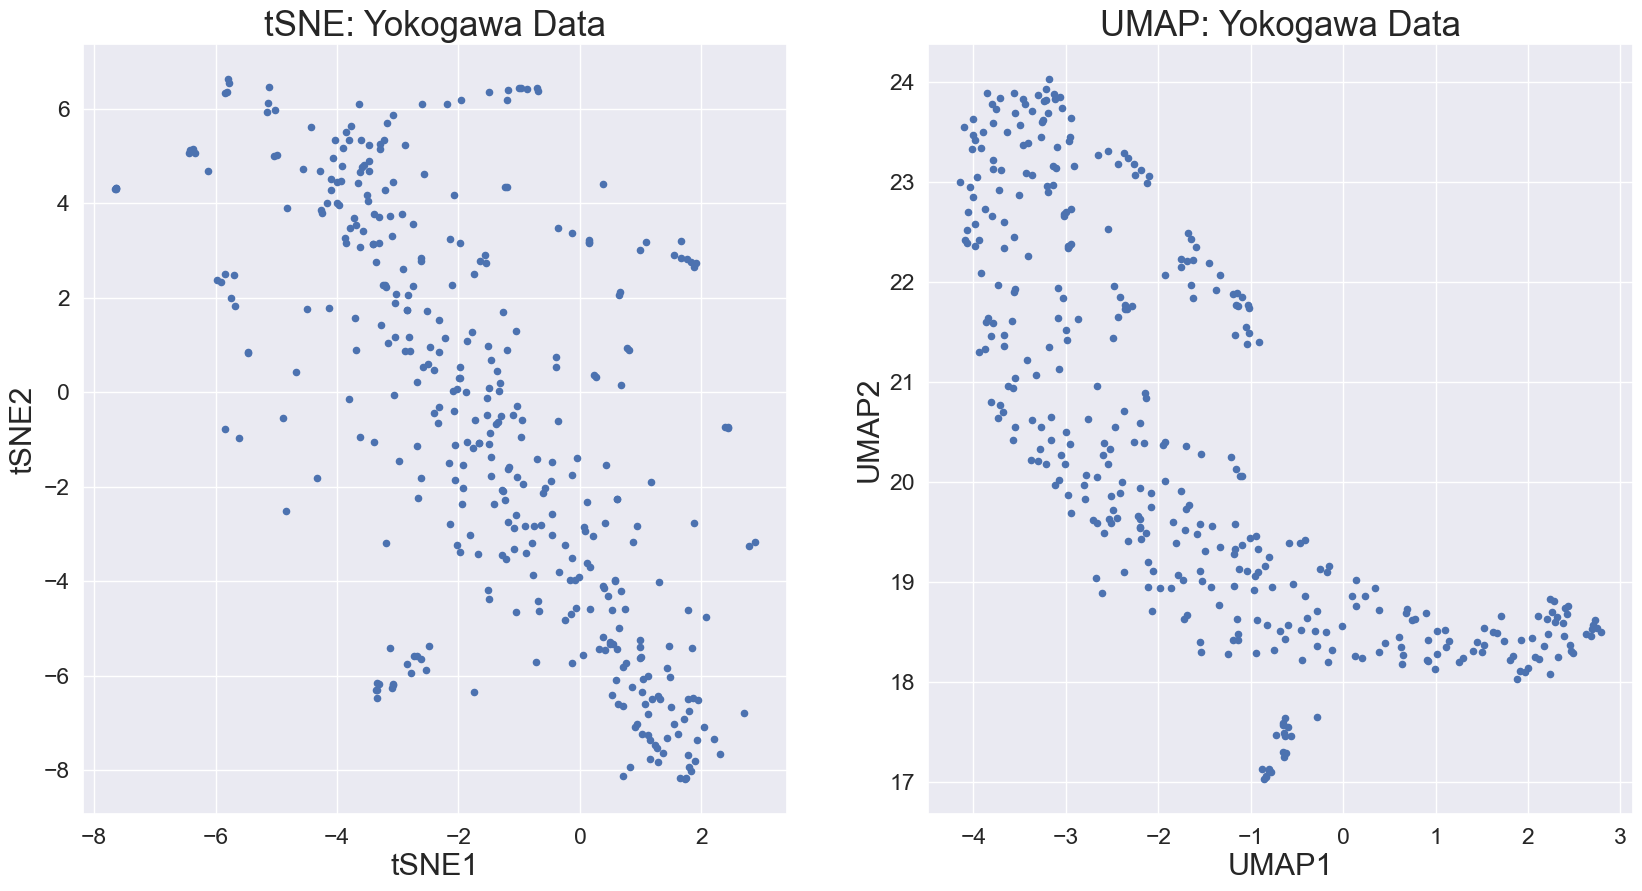

In [9]:
X_reduced = PCA(n_components = N_opt_pcs).fit_transform(x_1) #fitting the data to the significant principal components

umap_embedding = umap.UMAP(n_components = 2, n_neighbors = 100, 
                           init = X_reduced[:, 0:2], 
                           min_dist=0.05, n_epochs = 1000, random_state = 123, 
                           verbose = 0).fit_transform(X_reduced)

tsne_embedding = TSNE(n_components=2, perplexity=100, 
                      init=X_reduced[:, 0:2], 
                      learning_rate = 200, n_iter = 1000, random_state = 123, 
                      verbose = 0).fit_transform(X_reduced)

sns.set(font_scale = 1.5); plt.figure(figsize = (20, 10))
# colors = np.random.randint(384, size=(384))
plt.subplot(121)
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], s = 20)
plt.title('tSNE: Yokogawa Data', fontsize = 25)
plt.xlabel("tSNE1", fontsize = 22); plt.ylabel("tSNE2", fontsize = 22)

plt.subplot(122)
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s = 20)
plt.title('UMAP: Yokogawa Data', fontsize = 25)
plt.xlabel("UMAP1", fontsize = 22); plt.ylabel("UMAP2", fontsize = 22)

plt.show()

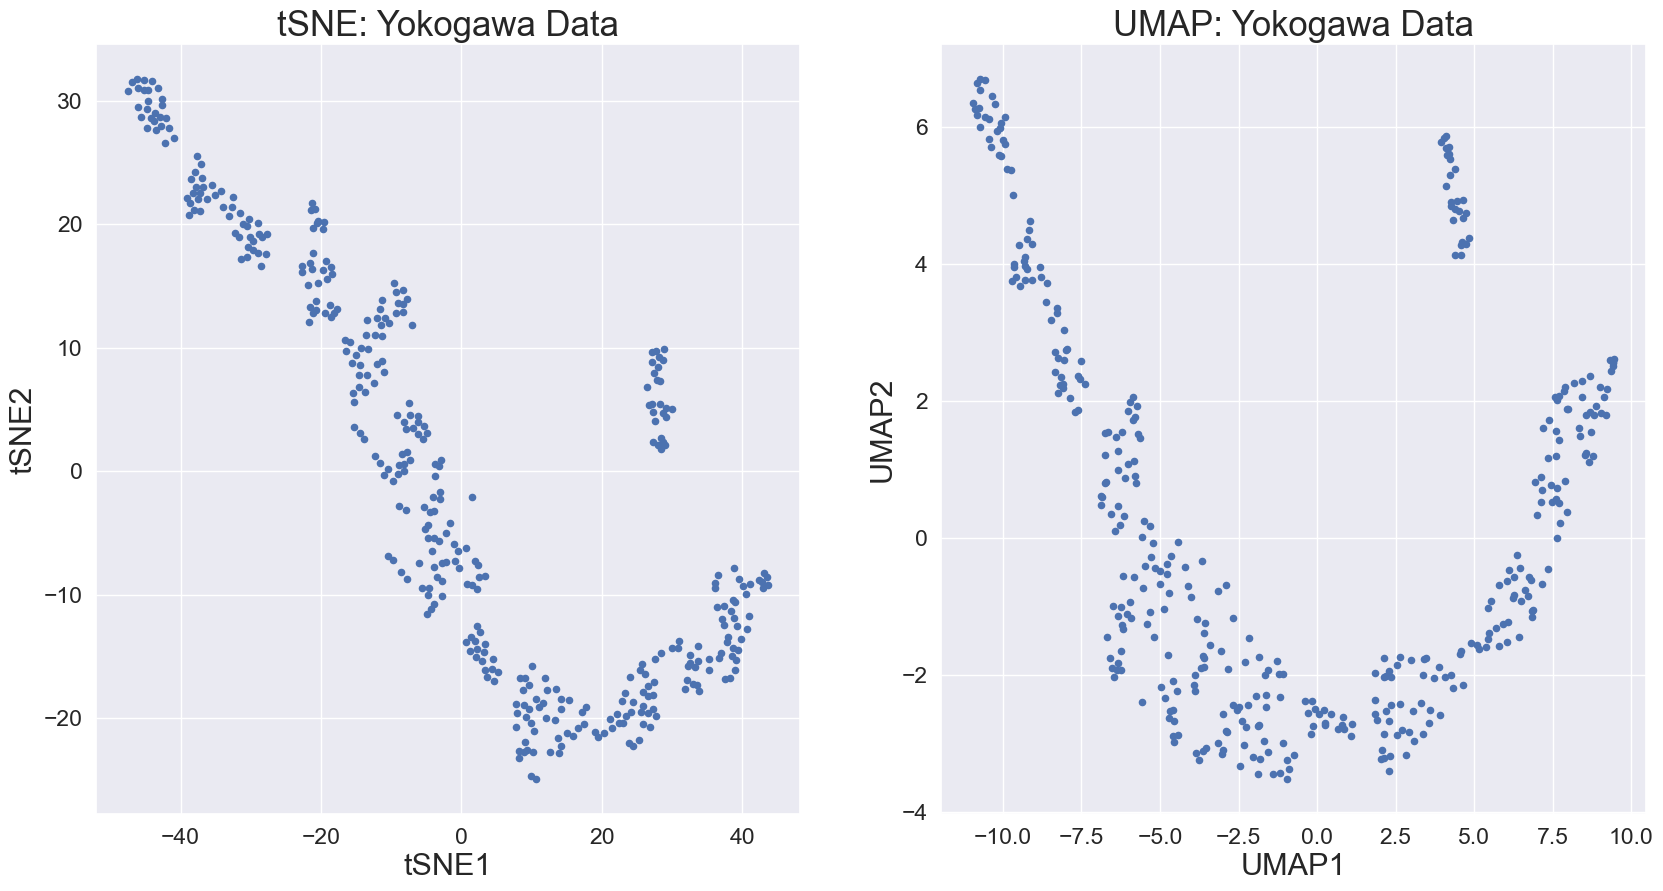

In [10]:
opt_perp = np.int64(np.round(np.sqrt(x_1.shape[0]), 0))
X_reduced = PCA(n_components = 2).fit_transform(x_1)

umap_embedding = umap.UMAP(n_components = 2, n_neighbors = opt_perp, 
                           init = X_reduced[:, 0:2], 
                           min_dist=0.3, n_epochs = 1000, random_state = 123, 
                           verbose = 0).fit_transform(X_reduced)

tsne_embedding = TSNE(n_components=2, perplexity=opt_perp, 
                      init=X_reduced[:, 0:2], 
                      learning_rate = 200, n_iter = 1000, random_state = 123, 
                      verbose = 0).fit_transform(X_reduced)

sns.set(font_scale = 1.5); plt.figure(figsize = (20, 10))

plt.subplot(121)
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], s = 20)
plt.title('tSNE: Yokogawa Data', fontsize = 25)
plt.xlabel("tSNE1", fontsize = 22); plt.ylabel("tSNE2", fontsize = 22)

plt.subplot(122)
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s = 20)
plt.title('UMAP: Yokogawa Data', fontsize = 25)
plt.xlabel("UMAP1", fontsize = 22); plt.ylabel("UMAP2", fontsize = 22)

plt.show()

## PCA vs tSNE vs UMAP - Cell count 

In [11]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [12]:
opt_perp = np.int64(np.round(np.sqrt(x_1.shape[0]), 0))
X_reduced = PCA(n_components = N_opt_pcs).fit_transform(x_1)

umap_embedding = umap.UMAP(n_components = 2, n_neighbors = opt_perp, 
                           init = X_reduced[:, 0:2], 
                           min_dist=0.3, n_epochs = 1000, random_state = 123, 
                           verbose = 0).fit_transform(X_reduced)

tsne_embedding = TSNE(n_components=2, perplexity=opt_perp, 
                      init=X_reduced[:, 0:2], 
                      learning_rate = 200, n_iter = 1000, random_state = 123, 
                      verbose = 0).fit_transform(X_reduced)

In [13]:



# create a pandas dataframe for the embeddings
d = pd.DataFrame({'tsne_x': tsne_embedding[:, 0], 'tsne_y': tsne_embedding[:, 1],
                   'umap_x': umap_embedding[:, 0], 'umap_y': umap_embedding[:, 1],
                  'pca_x' : X_reduced[:,0], 'pca_y': X_reduced[:,1]})

# create the scatter plot with hover information

fig = make_subplots(rows=1, cols=3)
fig.add_trace(go.Scatter(x=d['pca_x'], y=d['pca_y'], mode='markers',
                         marker=dict(color=df["Metadata_Count_Cells"]),
                         name='PCA',
                         text=df[["Metadata_pert_iname","Metadata_Count_Cells","Metadata_Well"]],
                         hovertemplate=
                         '<b>PCA Embedding</b><br><br>' +
                         'Pertubation: %{text[0]}<br>' +
                         'Cellcount: %{text[1]}<br>'+
                         'Wellno: %{text[2]},<br>'
                         '<extra></extra>'), row=1, col=1)

fig.add_trace(go.Scatter(x=d['tsne_x'], y=d['tsne_y'], mode='markers',
                         marker=dict(color=df["Metadata_Count_Cells"]),
                         name='t-SNE',
                         text=df[["Metadata_pert_iname","Metadata_Count_Cells","Metadata_Well"]],
                         hovertemplate=
                         '<b>t-SNE Embedding</b><br><br>' +
                         'Pertubation: %{text[0]}<br>' +
                         'Cellcount: %{text[1]}<br>'+
                         'Wellno: %{text[2]},<br>'
                         '<extra></extra>'), row=1, col=2)

fig.add_trace(go.Scatter(x=d['umap_x'], y=d['umap_y'], mode='markers',
                         marker=dict(color=df["Metadata_Count_Cells"]),
                         name='UMAP',
                         text=df[["Metadata_pert_iname","Metadata_Count_Cells","Metadata_Well"]],
                         hovertemplate=
                         '<b>UMAP Embedding</b><br><br>' +
                         'Pertubation: %{text[0]}<br>' +
                         'Cellcount: %{text[1]}<br>'+
                         'Wellno: %{text[2]},<br>'
                         '<extra></extra>'), row=1, col=3)


fig.update_xaxes(title_text="PCA1", row=1, col=1)
fig.update_yaxes(title_text="PCA2", row=1, col=1)
fig.update_xaxes(title_text="tSNE1", row=1, col=2)
fig.update_yaxes(title_text="tSNE2", row=1, col=2)
fig.update_xaxes(title_text="UMAP1", row=1, col=3)
fig.update_yaxes(title_text="UMAP2", row=1, col=3)
fig.update_layout(title_text="PCA vs tSNE vs UMAP")



fig.show()


## PCA vs tSNE vs UMAP - RNA intensity

In [14]:
fig = make_subplots(rows=1, cols=3)
fig.add_trace(go.Scatter(x=d['pca_x'], y=d['pca_y'], mode='markers',
                         marker=dict(color=df["Cells_Intensity_IntegratedIntensity_RNA"]),
                         name='PCA',
                         text=df[["Metadata_pert_iname","Metadata_Well","Cells_Intensity_IntegratedIntensity_RNA"]],
                         hovertemplate=
                         '<b>PCA Embedding</b><br><br>' +
                         'Pertubation: %{text[0]}<br>' +
                         'wellno: %{text[1]}<br>'+
                         'RNA_intensity: %{text[2]}<br>' 
                         '<extra></extra>'), row=1, col=1)

fig.add_trace(go.Scatter(x=d['tsne_x'], y=d['tsne_y'], mode='markers',
                         marker=dict(color=df["Cells_Intensity_IntegratedIntensity_RNA"]),
                         name='t-SNE',
                         text=df[["Metadata_pert_iname","Metadata_Well","Cells_Intensity_IntegratedIntensity_RNA"]],
                         hovertemplate=
                         '<b>t-SNE Embedding</b><br><br>' +
                         'Pertubation: %{text[0]}<br>' +
                         'wellno: %{text[1]}<br>'+
                         'RNA_intensity: %{text[2]}<br>' 
                         '<extra></extra>'), row=1, col=2)

fig.add_trace(go.Scatter(x=d['umap_x'], y=d['umap_y'], mode='markers',
                         marker=dict(color=df["Cells_Intensity_IntegratedIntensity_RNA"]),
                         name='UMAP',
                         text=df[["Metadata_pert_iname","Metadata_Well","Cells_Intensity_IntegratedIntensity_RNA"]],
                         hovertemplate=
                         '<b>UMAP Embedding</b><br><br>' +
                         'Pertubation: %{text[0]}<br>' +
                         'wellno: %{text[1]}<br>'+
                         'RNA_intensity: %{text[2]}<br>' 
                         '<extra></extra>'), row=1, col=3)


fig.update_xaxes(title_text="PCA1", row=1, col=1)
fig.update_yaxes(title_text="PCA2", row=1, col=1)
fig.update_xaxes(title_text="tSNE1", row=1, col=2)
fig.update_yaxes(title_text="tSNE2", row=1, col=2)
fig.update_xaxes(title_text="UMAP1", row=1, col=3)
fig.update_yaxes(title_text="UMAP2", row=1, col=3)
fig.update_layout(title_text="PCA vs tSNE vs UMAP")



fig.show()


## PCA vs tSNE vs UMAP - Area Shape

In [15]:
fig = make_subplots(rows=1, cols=3)
fig.add_trace(go.Scatter(x=d['pca_x'], y=d['pca_y'], mode='markers',
                         marker=dict(color=df["Cells_AreaShape_Solidity"]),
                         name='PCA',
                         text=df[["Metadata_pert_iname","Metadata_Count_Cells","Cells_Intensity_MinIntensityEdge_RNA","Cells_AreaShape_Solidity"]],
                         hovertemplate=
                         '<b>PCA Embedding</b><br><br>' +
                         'Pertubation: %{text[0]}<br>' +
                         'Cellcount: %{text[1]}<br>'+
                         'RNA_intensity: %{text[2]}<br>'+
                         'Areashape: %{text[3]}<br>'
                         '<extra></extra>'), row=1, col=1)

fig.add_trace(go.Scatter(x=d['tsne_x'], y=d['tsne_y'], mode='markers',
                         marker=dict(color=df["Cells_AreaShape_Solidity"]),
                         name='t-SNE',
                         text=df[["Metadata_pert_iname","Metadata_Count_Cells","Cells_Intensity_MinIntensityEdge_RNA","Cells_AreaShape_Solidity"]],
                         hovertemplate=
                         '<b>t-SNE Embedding</b><br><br>' +
                         'Pertubation: %{text[0]}<br>' +
                         'Cellcount: %{text[1]}<br>'+
                         'RNA_intensity: %{text[2]}<br>'+
                         'Areashape: %{text[3]}<br>' 
                         '<extra></extra>'), row=1, col=2)

fig.add_trace(go.Scatter(x=d['umap_x'], y=d['umap_y'], mode='markers',
                         marker=dict(color=df["Cells_AreaShape_Solidity"]),
                         name='UMAP',
                         text=df[["Metadata_pert_iname","Metadata_Count_Cells","Cells_Intensity_MinIntensityEdge_RNA","Cells_AreaShape_Solidity"]],
                         hovertemplate=
                         '<b>UMAP Embedding</b><br><br>' +
                         'Pertubation: %{text[0]}<br>' +
                         'Cellcount: %{text[1]}<br>'+
                         'RNA_intensity: %{text[2]}<br>'+
                         'Areashape: %{text[3]}<br>' 
                         '<extra></extra>'), row=1, col=3)


fig.update_xaxes(title_text="PCA1", row=1, col=1)
fig.update_yaxes(title_text="PCA2", row=1, col=1)
fig.update_xaxes(title_text="tSNE1", row=1, col=2)
fig.update_yaxes(title_text="tSNE2", row=1, col=2)
fig.update_xaxes(title_text="UMAP1", row=1, col=3)
fig.update_yaxes(title_text="UMAP2", row=1, col=3)
fig.update_layout(title_text="PCA vs tSNE vs UMAP")



fig.show()


## PCA vs tSNE vs UMAP - DNA granularity

In [16]:
fig = make_subplots(rows=1, cols=3)
fig.add_trace(go.Scatter(x=d['pca_x'], y=d['pca_y'], mode='markers',
                         marker=dict(color=df["Cells_Granularity_1_DNA"]),
                         name='PCA',
                         text=df[["Metadata_pert_iname","Metadata_Count_Cells","Cells_Intensity_MinIntensityEdge_RNA","Cells_AreaShape_Solidity","Cells_Granularity_1_DNA"]],
                         hovertemplate=
                         '<b>PCA Embedding</b><br><br>' +
                         'Pertubation: %{text[0]}<br>' +
                         'Cellcount: %{text[1]}<br>'+
                         'RNA_intensity: %{text[2]}<br>'+
                         'Areashape: %{text[3]}<br>'+
                         'DNA_granularity: %{text[4]}<br>'
                         '<extra></extra>'), row=1, col=1)

fig.add_trace(go.Scatter(x=d['tsne_x'], y=d['tsne_y'], mode='markers',
                         marker=dict(color=df["Cells_Granularity_1_DNA"]),
                         name='t-SNE',
                         text=df[["Metadata_pert_iname","Metadata_Count_Cells","Cells_Intensity_MinIntensityEdge_RNA","Cells_AreaShape_Solidity","Cells_Granularity_1_DNA"]],
                         hovertemplate=
                         '<b>t-SNE Embedding</b><br><br>' +
                         'Pertubation: %{text[0]}<br>' +
                         'Cellcount: %{text[1]}<br>'+
                         'RNA_intensity: %{text[2]}<br>'+
                         'Areashape: %{text[3]}<br>'+
                         'DNA_granularity: %{text[4]}<br>' 
                         '<extra></extra>'), row=1, col=2)

fig.add_trace(go.Scatter(x=d['umap_x'], y=d['umap_y'], mode='markers',
                         marker=dict(color=df["Cells_Granularity_1_DNA"]),
                         name='UMAP',
                         text=df[["Metadata_pert_iname","Metadata_Count_Cells","Cells_Intensity_MinIntensityEdge_RNA","Cells_AreaShape_Solidity","Cells_Granularity_1_DNA"]],
                         hovertemplate=
                         '<b>UMAP Embedding</b><br><br>' +
                         'Pertubation: %{text[0]}<br>' +
                         'Cellcount: %{text[1]}<br>'+
                         'RNA_intensity: %{text[2]}<br>'+
                         'Areashape: %{text[3]}<br>'+
                         'DNA_granularity: %{text[4]}<br>'
                         '<extra></extra>'), row=1, col=3)


fig.update_xaxes(title_text="PCA1", row=1, col=1)
fig.update_yaxes(title_text="PCA2", row=1, col=1)
fig.update_xaxes(title_text="tSNE1", row=1, col=2)
fig.update_yaxes(title_text="tSNE2", row=1, col=2)
fig.update_xaxes(title_text="UMAP1", row=1, col=3)
fig.update_yaxes(title_text="UMAP2", row=1, col=3)
fig.update_layout(title_text="PCA vs tSNE vs UMAP")



fig.show()


## PCA vs tSNE vs UMAP - Angle Between Adjacent Neighbours

In [17]:
fig = make_subplots(rows=1, cols=3)
fig.add_trace(go.Scatter(x=d['pca_x'], y=d['pca_y'], mode='markers',
                         marker=dict(color=df["Cells_Neighbors_AngleBetweenNeighbors_Adjacent"]),
                         name='PCA',
                         text=df[["Metadata_pert_iname","Metadata_Count_Cells","Cells_Intensity_MinIntensityEdge_RNA","Cells_AreaShape_Solidity","Cells_Granularity_1_DNA","Cells_Neighbors_AngleBetweenNeighbors_Adjacent"]],
                         hovertemplate=
                         '<b>PCA Embedding</b><br><br>' +
                         'Pertubation: %{text[0]}<br>' +
                         'Cellcount: %{text[1]}<br>'+
                         'RNA_intensity: %{text[2]}<br>'+
                         'Areashape: %{text[3]}<br>'+
                         'DNA_granularity: %{text[4]}<br>'+
                         'AngleBetweenNeighbors_Adjacent: %{text[5]}<br>'
                         '<extra></extra>'), row=1, col=1)

fig.add_trace(go.Scatter(x=d['tsne_x'], y=d['tsne_y'], mode='markers',
                         marker=dict(color=df["Cells_Neighbors_AngleBetweenNeighbors_Adjacent"]),
                         name='t-SNE',
                         text=df[["Metadata_pert_iname","Metadata_Count_Cells","Cells_Intensity_MinIntensityEdge_RNA","Cells_AreaShape_Solidity","Cells_Granularity_1_DNA","Cells_Neighbors_AngleBetweenNeighbors_Adjacent"]],
                         hovertemplate=
                         '<b>t-SNE Embedding</b><br><br>' +
                         'Pertubation: %{text[0]}<br>' +
                         'Cellcount: %{text[1]}<br>'+
                         'RNA_intensity: %{text[2]}<br>'+
                         'Areashape: %{text[3]}<br>'+
                         'DNA_granularity: %{text[4]}<br>'+
                         'AngleBetweenNeighbors_Adjacent: %{text[5]}<br>' 
                         '<extra></extra>'), row=1, col=2)

fig.add_trace(go.Scatter(x=d['umap_x'], y=d['umap_y'], mode='markers',
                         marker=dict(color=df["Cells_Neighbors_AngleBetweenNeighbors_Adjacent"]),
                         name='UMAP',
                         text=df[["Metadata_pert_iname","Metadata_Count_Cells","Cells_Intensity_MinIntensityEdge_RNA","Cells_AreaShape_Solidity","Cells_Granularity_1_DNA","Cells_Neighbors_AngleBetweenNeighbors_Adjacent"]],
                         hovertemplate=
                         '<b>UMAP Embedding</b><br><br>' +
                         'Pertubation: %{text[0]}<br>' +
                         'Cellcount: %{text[1]}<br>'+
                         'RNA_intensity: %{text[2]}<br>'+
                         'Areashape: %{text[3]}<br>'+
                         'DNA_granularity: %{text[4]}<br>'+
                         'AngleBetweenNeighbors_Adjacent: %{text[5]}<br>'
                         '<extra></extra>'), row=1, col=3)


fig.update_xaxes(title_text="PCA1", row=1, col=1)
fig.update_yaxes(title_text="PCA2", row=1, col=1)
fig.update_xaxes(title_text="tSNE1", row=1, col=2)
fig.update_yaxes(title_text="tSNE2", row=1, col=2)
fig.update_xaxes(title_text="UMAP1", row=1, col=3)
fig.update_yaxes(title_text="UMAP2", row=1, col=3)
fig.update_layout(title_text="PCA vs tSNE vs UMAP")



fig.show()

In [18]:
df_well=pd.read_csv("normalized_feature_select_batch.csv",usecols=["Metadata_Well"])

In [19]:
count = df_well.to_numpy()

In [20]:
arr_2d = np.reshape(count, (16, 24))

In [21]:
pd.DataFrame(arr_2d).to_csv('wells.csv')  

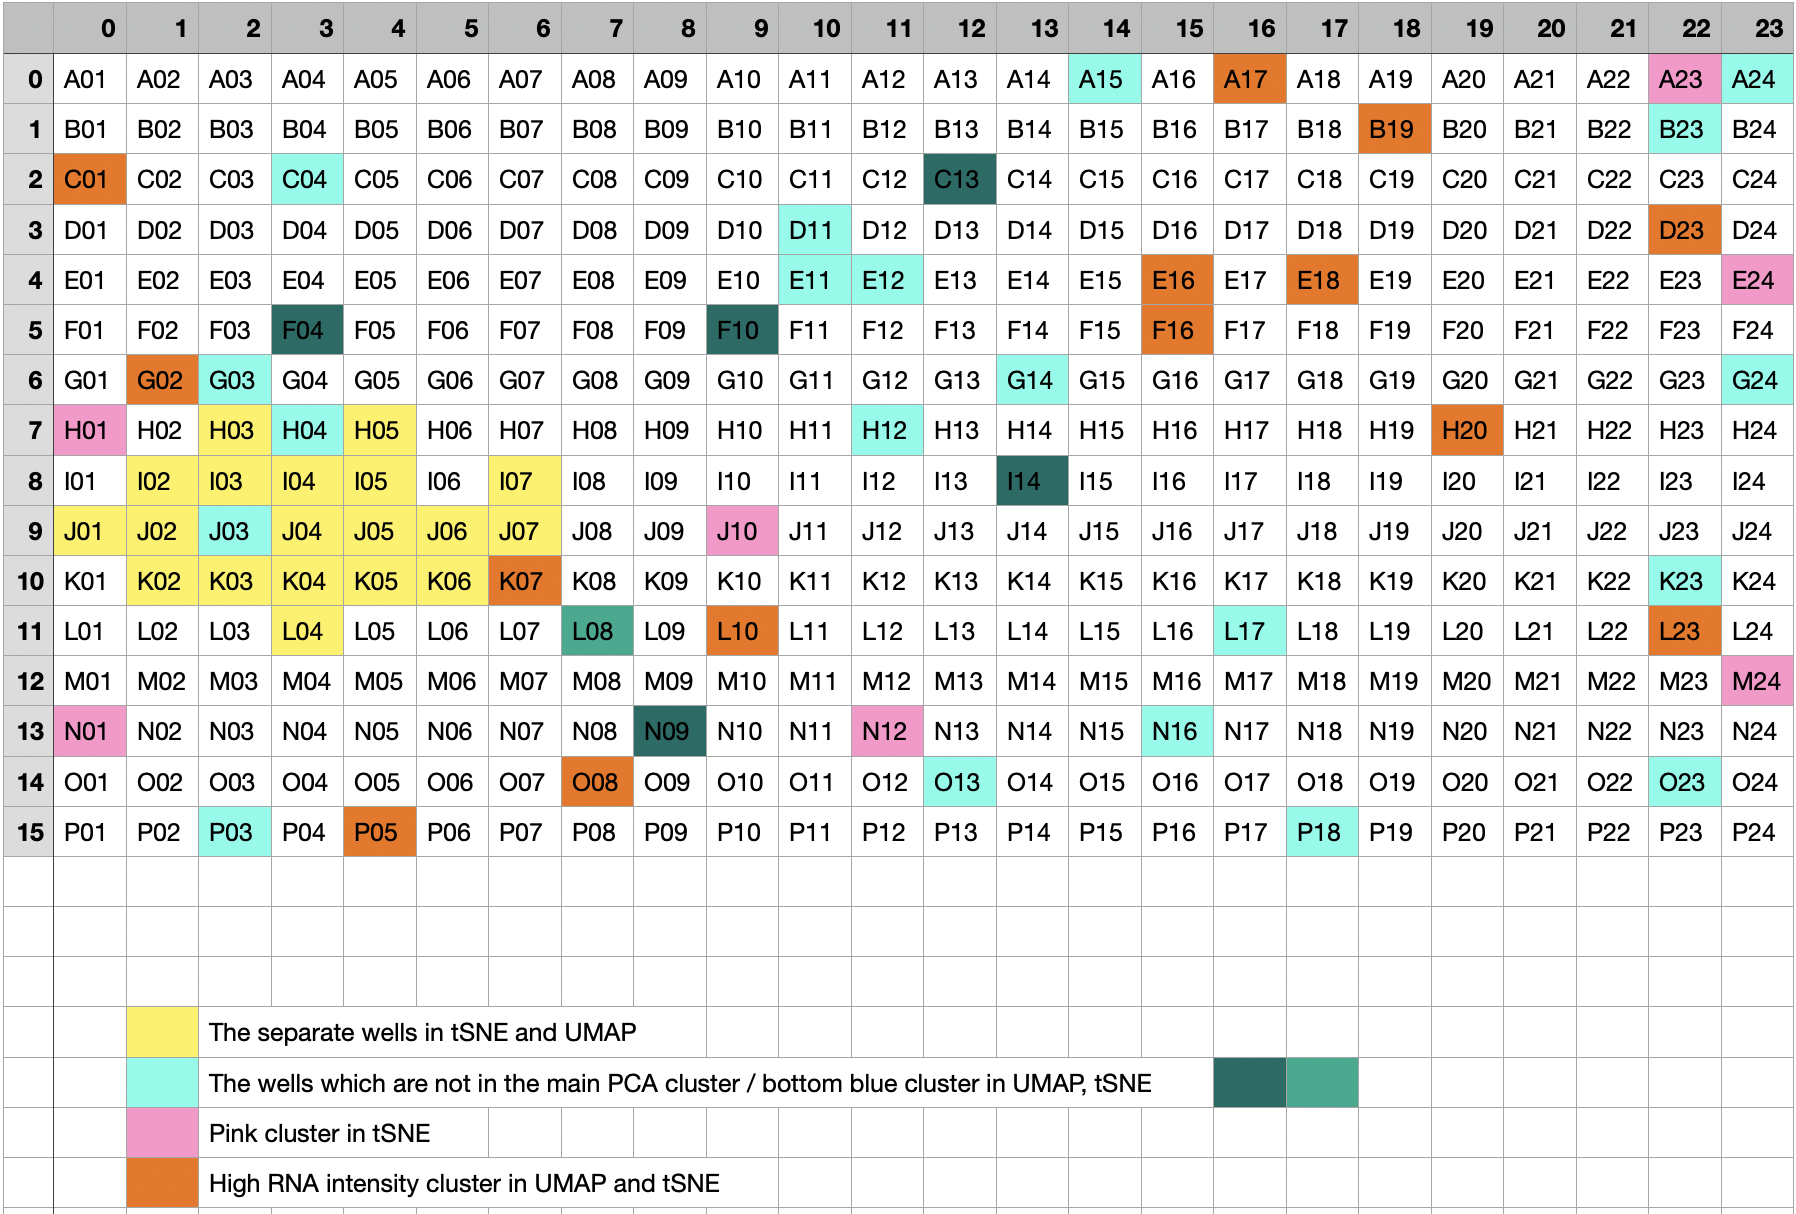

### Yellow Cluster:
- found in UMAP and tSNE

* EPZ015666 (H05) is a potent inhibitor of the lysine-specific demethylase 5A (KDM5A), which can regulate gene expression through histone modification.

* Selumetinib (K06) is a selective inhibitor of the mitogen-activated protein kinase (MAPK) kinase 1 (MEK1), which can inhibit the activation of the extracellular signal-regulated kinase (ERK) pathway, a key signaling pathway in cell growth and proliferation.

* Orphenadrine (L04) is a muscarinic receptor antagonist and an NMDA receptor antagonist, which can be used as a muscle relaxant and analgesic.

* Dosulepin (H03) is a tricyclic antidepressant that can inhibit the reuptake of serotonin and norepinephrine, leading to an increase in the levels of these neurotransmitters in the brain.

* SHP 99 (I07) is a small molecule inhibitor of the protein tyrosine phosphatase SHP2, which plays a critical role in various cellular signaling pathways, including those involved in cell growth, differentiation, and survival.

* DMSO (J01) is a solvent commonly used to dissolve small molecules for in vitro studies, but it can also have biological effects on cells, such as inducing differentiation or apoptosis.

* RGFP966 (J07) is a histone deacetylase (HDAC) inhibitor that can alter chromatin structure and gene expression.

* P5091 (K05) is a small molecule inhibitor of the ubiquitin-specific protease 7 (USP7), which can regulate the stability of various proteins, including the tumor suppressor p53.

* Homochlorcyclizine (K02) is a histamine H1 receptor antagonist, which can be used to treat allergies and motion sickness.

* GDC-0879 (I05) is a selective inhibitor of the serine/threonine protein kinase Aurora B, which plays a critical role in mitosis and cell division.

* UNC0642 (J06) is a selective inhibitor of the histone methyltransferase G9a, which can regulate gene expression through histone methylation.

* Compound 8 (J02) is a small molecule inhibitor of the ubiquitin-conjugating enzyme UBE2N, which can regulate the ubiquitination and degradation of various proteins.

* AZ191 (I02) is a potent inhibitor of the protein kinase TBK1, which plays a critical role in the innate immune response to viral infection.

* AZD7545 (J05) is a small molecule inhibitor of the cyclin-dependent kinase 1 (CDK1), which can regulate the cell cycle and DNA replication.

* Pomalidomide (K04) is an immunomodulatory drug that can modulate the activity of the immune system and has been approved for the treatment of multiple myeloma.

* CHIR-99021 (K03) is a selective inhibitor of the glycogen synthase kinase-3 (GSK-3), which can regulate various cellular processes, including cell differentiation, proliferation, and survival.

* ML324 (I04) is a small molecule inhibitor of the enzyme phosphoglycerate dehydrogenase (PHGDH), which can regulate the metabolism of serine and glycine in cancer cells.

* KH-CB19 (I03) is a small molecule activator of the calcium-dependent potassium channel KCa3.1, which can regulate the membrane potential and calcium signaling in cells.

* BIX-02188 (J04) is a selective inhibitor of the serine


## Pink Cluster 
- j10 : sirolimus
- H01: sirolimus
- A23: sirolimus
- E24: sirolimus
- N01: AZD2014
- N12: AZD2014
- M24: AZD2014
- E23: AZD2014

Sirolimus and AZD2014 are both drugs that are used in cancer treatment.

Sirolimus (also known as rapamycin) is an immunosuppressant drug that is used to prevent organ rejection after transplantation. It is also used in cancer treatment as an inhibitor of the mTOR pathway, which plays a key role in cell growth and proliferation. By inhibiting mTOR, sirolimus can slow down the growth of cancer cells.

AZD2014 is a dual mTOR inhibitor that targets both the mTORC1 and mTORC2 complexes. It is being investigated as a potential treatment for several types of cancer, including breast cancer, prostate cancer, and non-small cell lung cancer.

Both sirolimus and AZD2014 target the mTOR pathway, but they do so in slightly different ways. Sirolimus specifically inhibits mTORC1, while AZD2014 inhibits both mTORC1 and mTORC2. The dual inhibition of mTORC1 and mTORC2 by AZD2014 may offer some advantages over sirolimus in terms of efficacy and the ability to overcome drug resistance. However, more research is needed to fully understand the potential benefits and drawbacks of each drug.
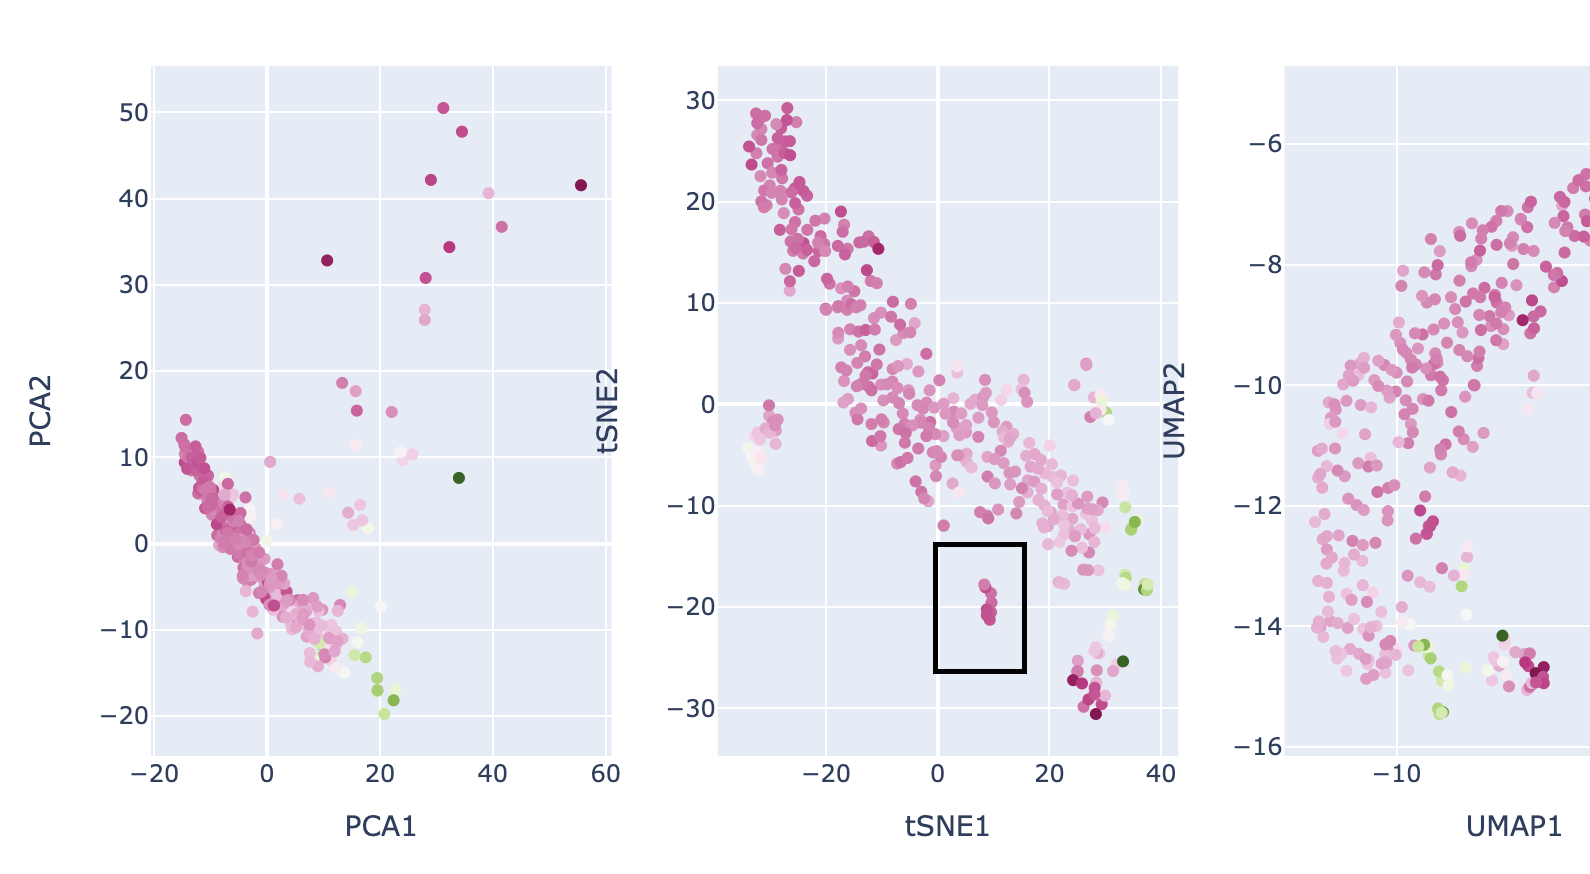

## Orange Cluster 
- L23: RG7112
- H20: valrubicin
- D23: valrubicin
- C01: valrubicin
- G02: valrubicin
- E18: Compound2
- E16: ispinesib
- L10: Compound2
- P05: Compound2
- A17: Compound2
- K07: AMG900
- B19 : AMG900
- O08: AMG900
- F16: AMG900

Valrubicin is a chemotherapy drug that belongs to the anthracycline class of drugs. It works by inhibiting the activity of topoisomerase II, an enzyme involved in DNA replication and repair, which can lead to DNA damage and cell death. Since transcription of RNA is dependent on DNA replication, valrubicin's effects on DNA can indirectly affect RNA intensity in cells.

AMG900, is a small molecule inhibitor that targets the activity of aurora kinase, an enzyme involved in cell division. By inhibiting aurora kinase, AMG900 can prevent cells from entering mitosis, which can lead to cell death. Since RNA synthesis is highest during the G1 phase of the cell cycle, AMG900's effects on cell division can indirectly impact RNA intensity in cells.

